**Problem Statement --> Check if the water is potable or not. (Whether it is safe to be comsumed by humans)**

####**water_potability.csv details**

1.**pH value**: Indicator of acidic or alkaline condition of water status. Permisible Range - **6.5 to 8.5**

2.**Hardness**: Capacity of water to precipitate soap caused by Calcium and Magnesium salts.

3.**Solids **(Total dissolved solids - TDS): The water with high TDS value indicates that water is highly mineralized. Desirable Limit - **500 mg/l and maximum 1000 mg/l**

4.**Chloramines**:Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Desirable Limit - levels up to **4 milligrams per liter (mg/L or 4 parts per million (ppm))** are considered safe in drinking water.

5.**Sulfate**: The principal commercial use of sulfate is in the chemical industry.
Range - **3 to 30 mg/L** in most freshwater supplies

6.**Conductivity**:Pure water is not a good conductor of electric current rather’s a good insulator. Range - **not exceeded 400 μS/cm.**

7.**Organic_carbon**:Total Organic Carbon (TOC) is a measure of the total amount of carbon in organic compounds in pure water. Range - **EPA < 2 mg/L** as TOC** in treated / drinking water**, and **< 4 mg/Lit** in source water which is **use for treatment.**

8.**Trihalomethanes**: THMs are chemicals which may be found in water treated with chlorine. Range - **up to 80 ppm is considered safe**

9.**Turbidity**:The turbidity of water depends on the quantity of solid matter present in the suspended state. Range - WHO recommended value of **5.00 NTU.**

10.**Potability**: Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable. Range - **0 or 1**


**Importing Libraries**

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import warnings; 
warnings.filterwarnings('ignore')

**Reading Data**

In [ ]:
wp = pd.read_csv("water_potability.csv")

In [ ]:
wp.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
wp.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Checking count of null values using isnull()**

In [ ]:
wp.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

**Removing missing values using fillna()**

In [ ]:
wp.fillna(wp.mean(),inplace = True)

**Again checking for null values. This time the data is clean. There are no null values now**

In [ ]:
wp.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
wp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
wp.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

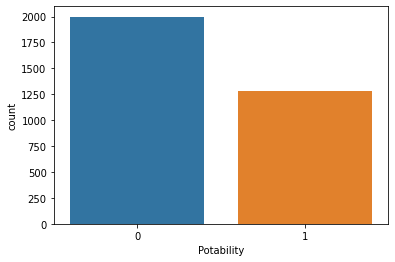

In [ ]:
sns.countplot(x ='Potability', data = wp)
plt.show()

In [ ]:
from sklearn.utils import resample
from sklearn.utils import shuffle

not_potable  = wp[wp['Potability']==0]   
potable = wp[wp['Potability']==1]  

new = resample(potable, replace = True, n_samples = 1998) 
wp = pd.concat([not_potable, new])

wp = shuffle(wp)

In [ ]:
wp.Potability.value_counts()

1    1998
0    1998
Name: Potability, dtype: int64

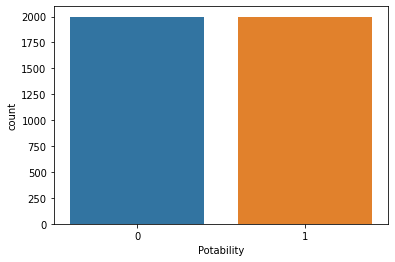

In [ ]:
sns.countplot(x ='Potability', data = wp)
plt.show()

##Heat map for co-relation

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

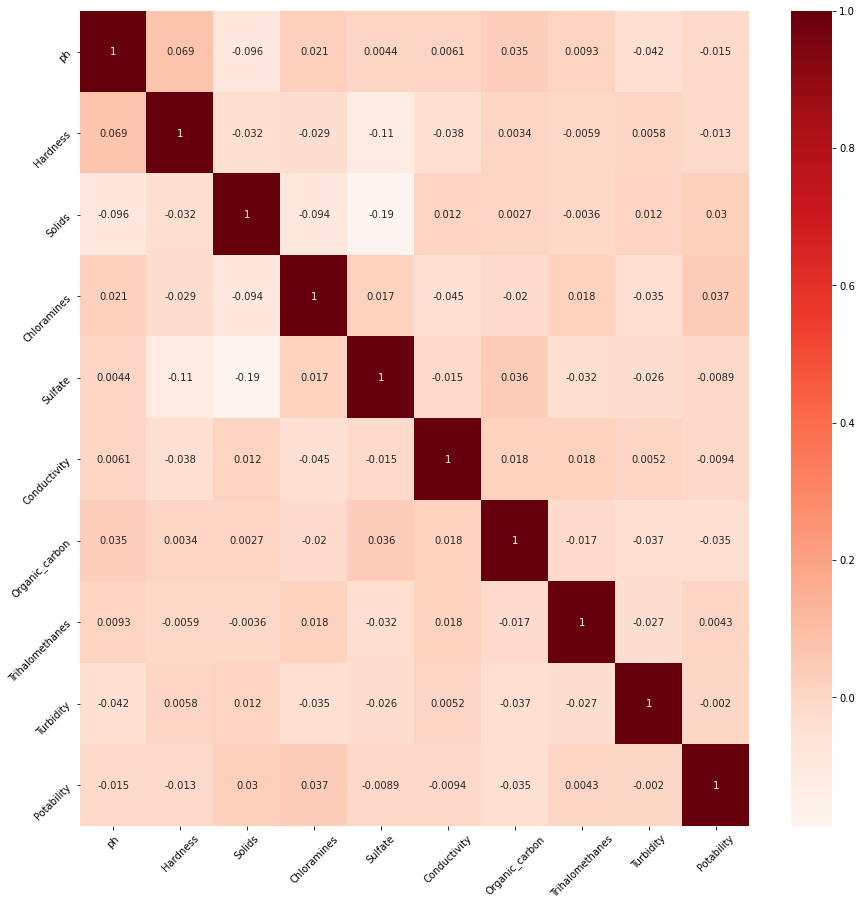

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(wp.corr(),annot=True,cmap="Reds")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [ ]:
wp.corr()['Potability'].sort_values()

Organic_carbon    -0.034724
ph                -0.014692
Hardness          -0.013188
Conductivity      -0.009428
Sulfate           -0.008901
Turbidity         -0.001972
Trihalomethanes    0.004309
Solids             0.029620
Chloramines        0.037106
Potability         1.000000
Name: Potability, dtype: float64

From the above graph we can observe that there is **no such co-relation** between the columns that can bring us to some conclusion.

##Box plot for outliers

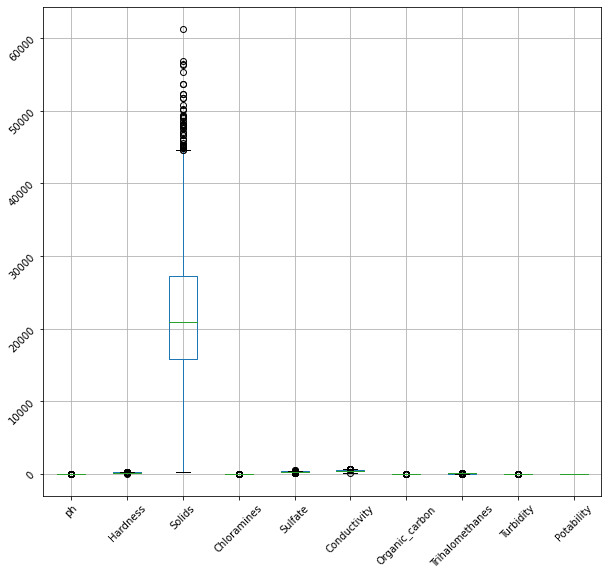

In [ ]:
wp.boxplot(figsize=(10,9))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

From the above graph we can observe that there are many outliers in solids column. But **we cannot remove the outliers as** it might affect our prediction. As these are outside the desired range they are pointing towards water impurities. If we remove these outliers **we might miss out the bad quality of human consumable water and end up giving wrong prediction**.

##Pair plot

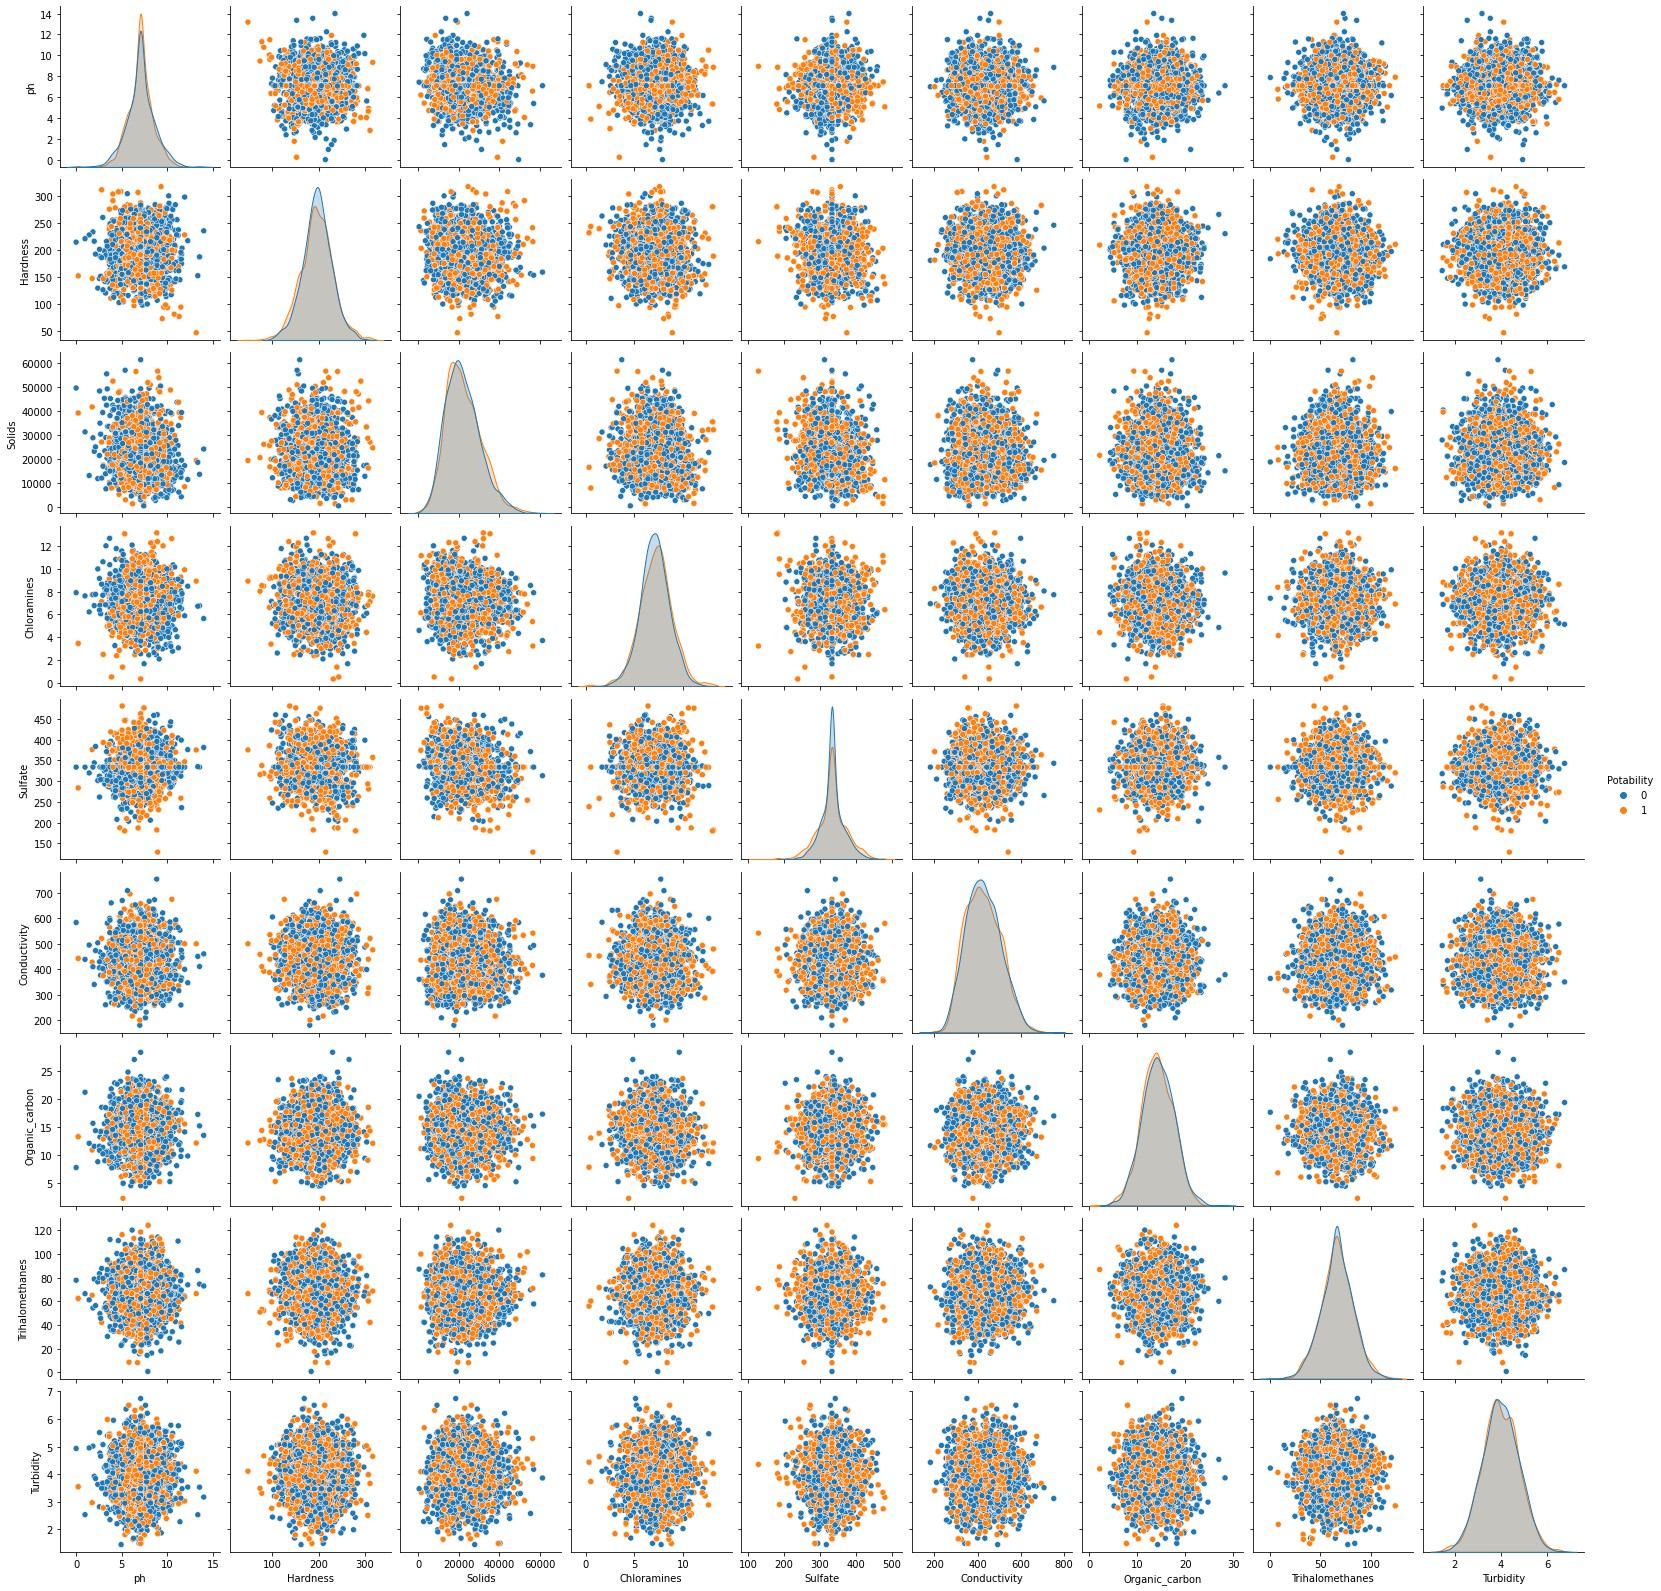

In [ ]:
sns.pairplot(wp,hue="Potability")
plt.show()


Even this graph is not useful for prediction

##Histogram for checking data distribution

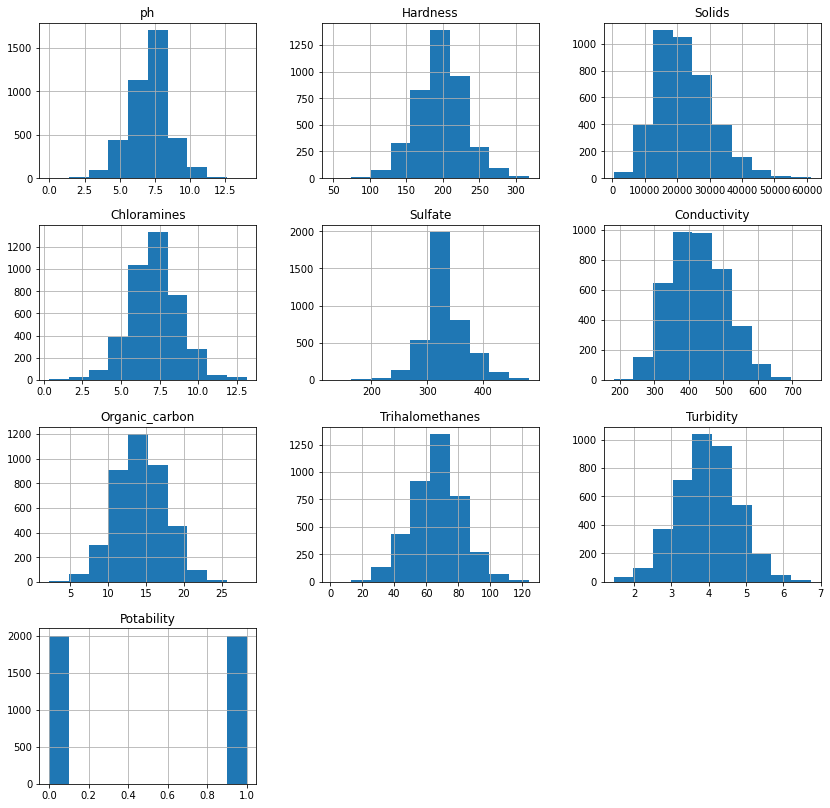

In [ ]:
wp.hist(figsize=(14,14))
plt.show()

From the above graph we can see that almost all the **data is normally distributed** and thus **Normalization is not required**.

We can see that the data rows whose target features have values 1 and 2 are more than the others with a significant difference. This dataset is imbalance. To minimize the impact of imbalanced data, we will randomize the data rows before modeling.

##Splitting of data


Dividing the data into dependent and independent variables

In [ ]:
x = wp.drop("Potability", axis = 1)
y = wp["Potability"]


In [ ]:
x.shape


(3996, 9)

In [ ]:
y.shape

(3996,)

In [ ]:
x

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
879,6.702496,208.553784,29057.227617,7.029491,302.744960,361.947758,10.614582,53.879737,4.267953
1967,7.080795,142.277413,21208.618285,9.502685,333.775777,429.690156,16.292718,58.962902,2.601518
1688,8.031055,222.628424,18134.835020,8.754513,314.471566,452.970285,12.065963,78.549712,3.338880
1487,8.062066,125.705329,35381.670759,4.740111,333.775777,463.461640,7.091229,98.594560,3.040031
2467,7.080795,253.149651,12037.770386,4.384358,325.413248,422.389292,13.168299,40.052151,3.399945
...,...,...,...,...,...,...,...,...,...
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
854,8.296344,198.197051,17468.999802,8.262904,369.590740,294.325142,18.026098,44.061625,5.400811
119,7.812804,196.583886,42550.841816,7.334648,333.775777,442.545775,14.666917,66.396293,6.204846
862,8.159667,215.648216,17068.298863,8.769622,319.253201,459.541159,14.192544,60.373722,2.957195


In [ ]:
y

879     0
1967    1
1688    0
1487    1
2467    0
       ..
3       0
854     0
119     0
862     0
2477    0
Name: Potability, Length: 3996, dtype: int64

splitting data into train and test

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.3,random_state=1,stratify=y)

In [ ]:
x_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1862,7.080795,162.263688,28790.547685,7.621234,377.719387,364.273578,14.210091,99.118601,4.476991
721,3.633163,179.350577,28584.175810,5.246382,292.440536,500.866018,8.956401,77.360985,3.349572
2344,8.423084,153.032892,15924.799687,11.101628,329.132239,431.167468,12.321633,52.631310,3.958609
231,4.443239,178.956206,25008.532248,4.948815,298.576676,429.544773,17.729724,56.347689,3.268325
2568,8.558663,214.107325,38767.756369,6.608100,310.014951,382.622275,15.896958,57.196827,2.590635
...,...,...,...,...,...,...,...,...,...
297,7.080795,191.285218,21948.325362,5.626787,355.488766,509.406822,16.691471,84.107738,4.109590
659,5.555353,154.300684,20503.430055,9.644997,313.470297,355.206968,18.468690,75.140362,4.536146
603,8.719764,219.778898,30681.120258,7.268765,340.918490,481.853415,9.151209,50.178596,2.887725
157,7.080795,190.779460,12224.310506,4.646211,308.564886,399.271359,11.876797,61.886636,3.463173


In [ ]:
y_train

1862    0
721     1
2344    1
231     0
2568    0
       ..
297     1
659     0
603     0
157     0
2789    1
Name: Potability, Length: 2797, dtype: int64

Data Standardization.

In [ ]:
ss=StandardScaler()
x =ss.fit_transform(x_train)


Training the model

##Decision Tree for the probality of water (0/1)

Using criterion='entropy'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dectree= DecisionTreeClassifier(criterion='entropy', random_state=0)  
dectree.fit(x_train, y_train)  

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_test

2800    1
2072    0
1917    1
2892    0
860     0
       ..
1019    0
1362    0
2279    0
536     0
1188    1
Name: Potability, Length: 1199, dtype: int64

In [ ]:
y_hat = dectree.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_hat = dectree.predict(x_test)
print(accuracy_score(y_hat, y_test))

0.7347789824854045


In [ ]:
print(confusion_matrix(y_hat,y_test))

[[392 111]
 [207 489]]


In [ ]:
print(classification_report(y_hat,y_test))

              precision    recall  f1-score   support

           0       0.65      0.78      0.71       503
           1       0.81      0.70      0.75       696

    accuracy                           0.73      1199
   macro avg       0.73      0.74      0.73      1199
weighted avg       0.75      0.73      0.74      1199



Using criterion='gini'

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dectree= DecisionTreeClassifier(criterion='gini', random_state=None)  
dectree.fit(x_train, y_train)  
print(dectree.predict(x_test))

[1 1 1 ... 0 0 1]


In [ ]:
y_hat = dectree.predict(x_test)
print(accuracy_score(y_hat, y_test))


0.7306088407005839


In [ ]:
print(confusion_matrix(y_hat,y_test))

[[395 119]
 [204 481]]


In [ ]:
print(classification_report(y_hat,y_test))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       514
           1       0.80      0.70      0.75       685

    accuracy                           0.73      1199
   macro avg       0.73      0.74      0.73      1199
weighted avg       0.74      0.73      0.73      1199



###KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)
print(knn.predict(x_test))

[1 1 1 ... 0 1 1]


In [ ]:
y_hat1 = knn.predict(x_test)
print(accuracy_score(y_hat1, y_test))

0.5954962468723937


In [ ]:
print(confusion_matrix(y_hat1,y_test))

[[348 234]
 [251 366]]


In [ ]:
print(classification_report(y_hat1,y_test))

              precision    recall  f1-score   support

           0       0.58      0.60      0.59       582
           1       0.61      0.59      0.60       617

    accuracy                           0.60      1199
   macro avg       0.60      0.60      0.60      1199
weighted avg       0.60      0.60      0.60      1199



###LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg= LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_hat2 = logreg.predict(x_test)
print(accuracy_score(y_hat2, y_test))

0.4945788156797331


In [ ]:
print(confusion_matrix(y_hat2,y_test))

[[321 328]
 [278 272]]


In [ ]:
print(classification_report(y_test, y_hat2))


              precision    recall  f1-score   support

           0       0.49      0.54      0.51       599
           1       0.49      0.45      0.47       600

    accuracy                           0.49      1199
   macro avg       0.49      0.49      0.49      1199
weighted avg       0.49      0.49      0.49      1199



In [ ]:
x_train.shape

(2797, 9)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train,y_train)

RandomForestClassifierScore = rfc.score(x_test, y_test)

In [ ]:
y_hat = rfc.predict(x_test)
print(accuracy_score(y_hat, y_test))

0.8165137614678899


In [ ]:
print(confusion_matrix(y_hat,y_test))

[[509 130]
 [ 90 470]]


In [ ]:
print(classification_report(y_hat,y_test))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       639
           1       0.78      0.84      0.81       560

    accuracy                           0.82      1199
   macro avg       0.82      0.82      0.82      1199
weighted avg       0.82      0.82      0.82      1199



###Neuron creation

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(8,activation= "sigmoid", input_shape=(9,)),
                             tf.keras.layers.Dense(4,activation= "tanh"),
                             tf.keras.layers.Dense(3,activation="softmax")
                             ])
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy")
trained_model = model.fit(x_train, y_train, epochs=100,batch_size=15)

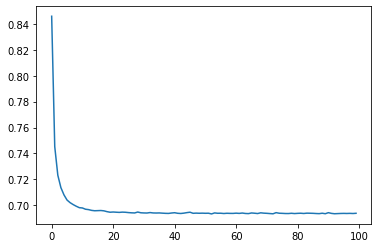

In [ ]:
plt.plot(trained_model.history['loss'])
plt.show()

In [ ]:
y_hat3 = model.predict(x_test)
y_hat3.argmax(axis=1)
y_hat4=y_hat3.argmax(axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat4))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       599
           1       0.50      1.00      0.67       600

    accuracy                           0.50      1199
   macro avg       0.25      0.50      0.33      1199
weighted avg       0.25      0.50      0.33      1199



###Neuron creation using dropout function

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(3,activation= "relu", input_shape=(9,)),
                             tf.keras.layers.Dense(2,activation= "tanh"),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3,activation= "softmax")
                             ])
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy")
trained_model = model.fit(x_train, y_train, epochs=100,batch_size=15)

Epoch 1/100
187/187 [==============================] - 1s 2ms/step - loss: 1.2729
Epoch 2/100
187/187 [==============================] - 0s 2ms/step - loss: 0.9998
Epoch 3/100
187/187 [==============================] - 0s 2ms/step - loss: 0.8588
Epoch 4/100
187/187 [==============================] - 0s 2ms/step - loss: 0.8257
Epoch 5/100
187/187 [==============================] - 0s 2ms/step - loss: 0.7750
Epoch 6/100
187/187 [==============================] - 0s 1ms/step - loss: 0.7704
Epoch 7/100
187/187 [==============================] - 0s 2ms/step - loss: 0.7589
Epoch 8/100
187/187 [==============================] - 0s 2ms/step - loss: 0.7415
Epoch 9/100
187/187 [==============================] - 0s 2ms/step - loss: 0.7386
Epoch 10/100
187/187 [==============================] - 0s 2ms/step - loss: 0.7312
Epoch 11/100
187/187 [==============================] - 0s 2ms/step - loss: 0.7227
Epoch 12/100
187/187 [==============================] - 0s 2ms/step - loss: 0.7194
Epoch 13/100


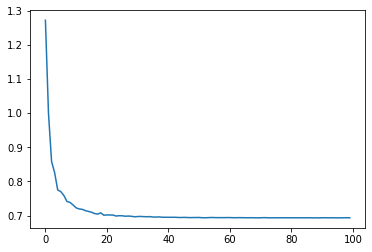

In [ ]:
plt.plot(trained_model.history['loss'])
plt.show()

In [ ]:
y_hat5 = model.predict(x_test)
y_hat5.argmax(axis=1)
y_hat6=y_hat5.argmax(axis=1)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat6))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67       599
           1       0.00      0.00      0.00       600

    accuracy                           0.50      1199
   macro avg       0.25      0.50      0.33      1199
weighted avg       0.25      0.50      0.33      1199



###Neuron creation using regularization function

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(3,activation= "sigmoid", input_shape=(9,)),
                             tf.keras.layers.Dense(2,activation= "tanh",kernel_regularizer=tf.keras.regularizers.L1(0.1)),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(3,activation= "softmax")
                             ])
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy")
trained_model = model.fit(x_train, y_train, epochs=50,batch_size=15)

Epoch 1/50
187/187 [==============================] - 1s 2ms/step - loss: 2.0617
Epoch 2/50
187/187 [==============================] - 0s 2ms/step - loss: 1.4078
Epoch 3/50
187/187 [==============================] - 0s 2ms/step - loss: 1.0658
Epoch 4/50
187/187 [==============================] - 0s 2ms/step - loss: 0.9178
Epoch 5/50
187/187 [==============================] - 0s 2ms/step - loss: 0.8448
Epoch 6/50
187/187 [==============================] - 0s 2ms/step - loss: 0.8025
Epoch 7/50
187/187 [==============================] - 0s 2ms/step - loss: 0.7803
Epoch 8/50
187/187 [==============================] - 0s 2ms/step - loss: 0.7663
Epoch 9/50
187/187 [==============================] - 0s 2ms/step - loss: 0.7503
Epoch 10/50
187/187 [==============================] - 0s 2ms/step - loss: 0.7427
Epoch 11/50
187/187 [==============================] - 0s 2ms/step - loss: 0.7381
Epoch 12/50
187/187 [==============================] - 0s 2ms/step - loss: 0.7326
Epoch 13/50
187/187 [====

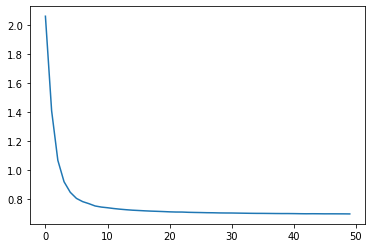

In [ ]:
plt.plot(trained_model.history['loss'])
plt.show()

In [ ]:
y_hat7 = model.predict(x_test)
y_hat7.argmax(axis=1)
y_hat8=y_hat7.argmax(axis=1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat8))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       599
           1       0.50      1.00      0.67       600

    accuracy                           0.50      1199
   macro avg       0.25      0.50      0.33      1199
weighted avg       0.25      0.50      0.33      1199



###After performing various algorithms and using ANN we are getting almost the same accuracy of 60% whereas RandonForestClassifier is giving 81% accuracy.